In [2]:
#üstekki görüntüleri çekmek için bu kod
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

In [4]:
# İndirilecek dizin URL'si
base_url = 'https://svs.gsfc.nasa.gov/vis/a000000/a005200/a005276/frames/3840x2160_16x9_60p/nightlights_2023_globe/'

# İndirme klasörü
download_folder = 'nightlights_2023_globe_images'
os.makedirs(download_folder, exist_ok=True)

In [ ]:
# Sayfanın içeriğini al
response = requests.get(base_url)
soup = BeautifulSoup(response.text, 'html.parser')

# Tüm bağlantıları bul
links = soup.find_all('a')

# Görüntü bağlantılarını filtrele ve indir
for link in links:
    href = link.get('href')
    if href and href.endswith('.exr'):
        image_url = urljoin(base_url, href)
        image_name = os.path.join(download_folder, href)
        print(f'İndiriliyor: {image_url}')
        img_data = requests.get(image_url).content
        with open(image_name, 'wb') as handler:
            handler.write(img_data)


İndiriliyor: https://svs.gsfc.nasa.gov/vis/a000000/a005200/a005276/frames/3840x2160_16x9_60p/nightlights_2023_globe/nightlights_2023_globe.01000.exr
İndiriliyor: https://svs.gsfc.nasa.gov/vis/a000000/a005200/a005276/frames/3840x2160_16x9_60p/nightlights_2023_globe/nightlights_2023_globe.01001.exr
İndiriliyor: https://svs.gsfc.nasa.gov/vis/a000000/a005200/a005276/frames/3840x2160_16x9_60p/nightlights_2023_globe/nightlights_2023_globe.01002.exr
İndiriliyor: https://svs.gsfc.nasa.gov/vis/a000000/a005200/a005276/frames/3840x2160_16x9_60p/nightlights_2023_globe/nightlights_2023_globe.01003.exr
İndiriliyor: https://svs.gsfc.nasa.gov/vis/a000000/a005200/a005276/frames/3840x2160_16x9_60p/nightlights_2023_globe/nightlights_2023_globe.01004.exr
İndiriliyor: https://svs.gsfc.nasa.gov/vis/a000000/a005200/a005276/frames/3840x2160_16x9_60p/nightlights_2023_globe/nightlights_2023_globe.01005.exr
İndiriliyor: https://svs.gsfc.nasa.gov/vis/a000000/a005200/a005276/frames/3840x2160_16x9_60p/nightlights_2

In [4]:
!pip install OpenEXR

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.6 MB/s eta 0:00:00


In [1]:
import OpenEXR
import Imath
import numpy as np
import matplotlib.pyplot as plt
import os


In [5]:
# EXR dosyasını okuyan ve RGB formatında döndüren fonksiyon
def load_exr_image(file_path):
    # Dosyayı aç
    exr_file = OpenEXR.InputFile(file_path)
    
    # EXR formatı HALF olduğundan dönüşüm tipi belirleniyor
    pixel_type = Imath.PixelType(Imath.PixelType.HALF)
    
    # Tüm RGB kanallarını oku ve float32'ye dönüştür
    data = [np.frombuffer(exr_file.channel(c, pixel_type), dtype=np.float16).astype(np.float32).reshape((2160, 3840)) for c in ['R', 'G', 'B']]
    rgb_image = np.stack(data, axis=-1)
    
    return rgb_image

In [7]:

# Görselleştirme fonksiyonu
def visualize_exr_images(folder_path, num_images=10):
    # Klasördeki tüm .exr dosyalarını al
    exr_files = [f for f in os.listdir(folder_path) if f.endswith('.exr')]
    
    # İlk `num_images` kadar dosyayı işle
    for file_name in exr_files[:num_images]:
        file_path = os.path.join(folder_path, file_name)
        
        # RGB görüntüyü yükle
        rgb_image = load_exr_image(file_path)
        
        # Görüntüyü normalize et
        normalized_image = rgb_image / np.max(rgb_image)
        
        # Görselleştir
        plt.figure(figsize=(10, 6))
        plt.imshow(normalized_image)
        plt.title(f"EXR Uydu Görüntüsü: {file_name}")
        plt.axis("off")
        plt.show()


In [9]:
# Veri hazırlığı fonksiyonu
def prepare_brightness_data(folder_path):
    # Klasördeki tüm .exr dosyalarını al
    exr_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.exr')])
    
    # Parlaklık verilerini saklamak için liste
    brightness_data = []

    for file_name in exr_files:
        file_path = os.path.join(folder_path, file_name)
        
        # RGB görüntüyü yükle
        rgb_image = load_exr_image(file_path)
        
        # Toplam parlaklık (örnek ölçüm olarak)
        total_brightness = np.sum(rgb_image)
        
        # Tarih ve parlaklık verisini kaydet
        brightness_data.append((file_name, total_brightness))
    
    return brightness_data

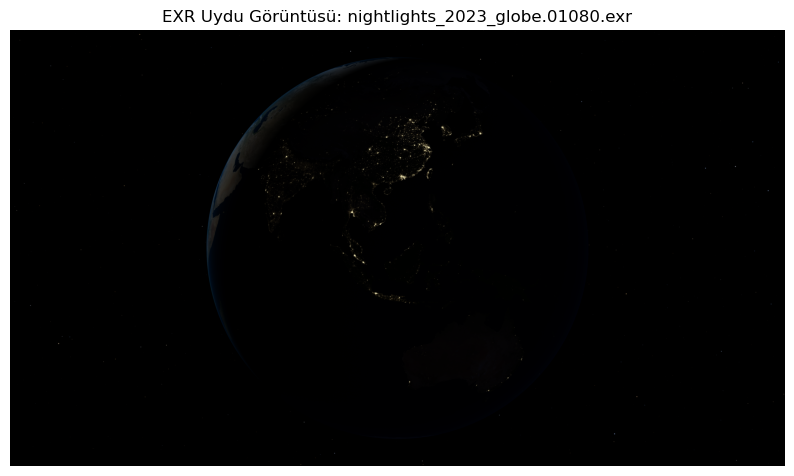

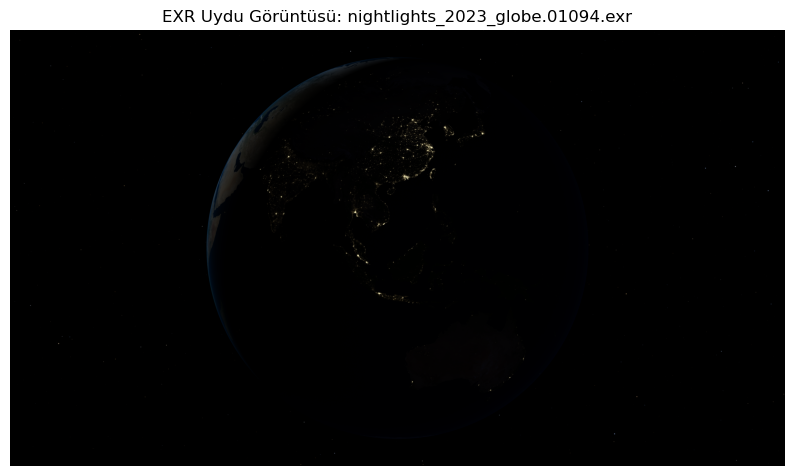

In [11]:
folder_path = "./nightlights_2023_globe_images/"
visualize_exr_images(folder_path, num_images=2)

In [12]:
brightness_data = prepare_brightness_data(folder_path)

In [22]:
brightness_data[:10]

[('nightlights_2023_globe.01000.exr', 81740.58),
 ('nightlights_2023_globe.01001.exr', 81767.49),
 ('nightlights_2023_globe.01002.exr', 81819.305),
 ('nightlights_2023_globe.01003.exr', 81868.13),
 ('nightlights_2023_globe.01004.exr', 81900.664),
 ('nightlights_2023_globe.01005.exr', 81985.56),
 ('nightlights_2023_globe.01006.exr', 82030.02),
 ('nightlights_2023_globe.01007.exr', 82080.43),
 ('nightlights_2023_globe.01008.exr', 82125.69),
 ('nightlights_2023_globe.01009.exr', 82133.59)]

In [24]:
import pandas as pd

# DataFrame'e dönüştür
df = pd.DataFrame(brightness_data, columns=["file_name", "brightness"])

# Dosya isminden sırayı çıkart
df['sequence'] = df['file_name'].str.extract(r'(\d{5})').astype(int)


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Parlaklık değerlerini normalize et
scaler = MinMaxScaler()
df['normalized_brightness'] = scaler.fit_transform(df[['brightness']])

In [27]:
import numpy as np

# Giriş dizilerini oluştur
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)



In [253]:
# Test verisi olarak son 100 günü ayır
test_size = 100
sequence_length = 10
train_data = df['normalized_brightness'].values[:-test_size]
test_data = df['normalized_brightness'].values[-test_size:]

# LSTM girişlerini oluştur
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# LSTM girişlerini yeniden şekillendir
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## Basit LSTM Modeli

In [218]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Modeli oluştur
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Modeli derle
model.compile(optimizer='Adam', loss='mse')


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [221]:
import tensorflow as tf
# Lossları kaydetmek için callback
class LossHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        super(LossHistory, self).__init__()
        self.train_loss_history = []
        self.test_loss_history = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_loss_history.append(logs['loss'])
        self.test_loss_history.append(logs['val_loss'])

In [223]:
# Loss callback nesnesi
loss_callback = LossHistory()

# Modeli eğit
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[loss_callback]
)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2951 - val_loss: 0.1716
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0304 - val_loss: 0.0215
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0142 - val_loss: 2.5898e-05
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096 - val_loss: 6.7517e-04
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0087 - val_loss: 8.1845e-05
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - val_loss: 5.6685e-04
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - val_loss: 6.0072e-04
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - val_loss: 0.0025
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - val_loss: 1.3258e-04
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - val_loss: 0.0011
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - val_loss: 1.2211e-05
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

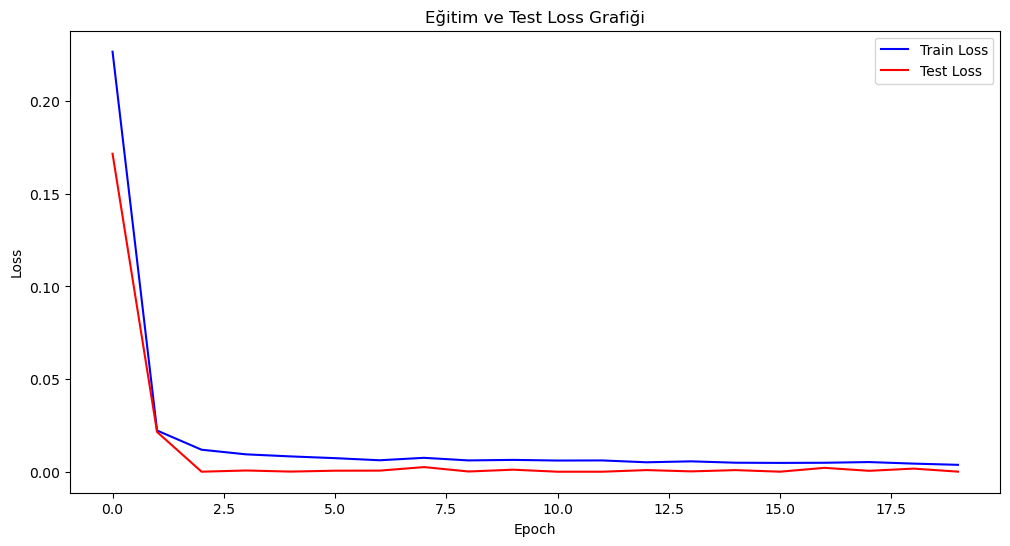

In [224]:
# Train ve Test Loss grafiği
plt.figure(figsize=(12, 6))
plt.plot(loss_callback.train_loss_history, label='Train Loss', color='blue')  # Callback içindeki train loss
plt.plot(loss_callback.test_loss_history, label='Test Loss', color='red')    # Callback içindeki test loss
plt.title("Eğitim ve Test Loss Grafiği")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 20 epoch fazla görünüyor overfit için earlystopping eklenebilir

### Tahmin ve gerçek değerlerin görselleştirilmesi

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Mean Squared Error (MSE): 5.35154395038262e-05


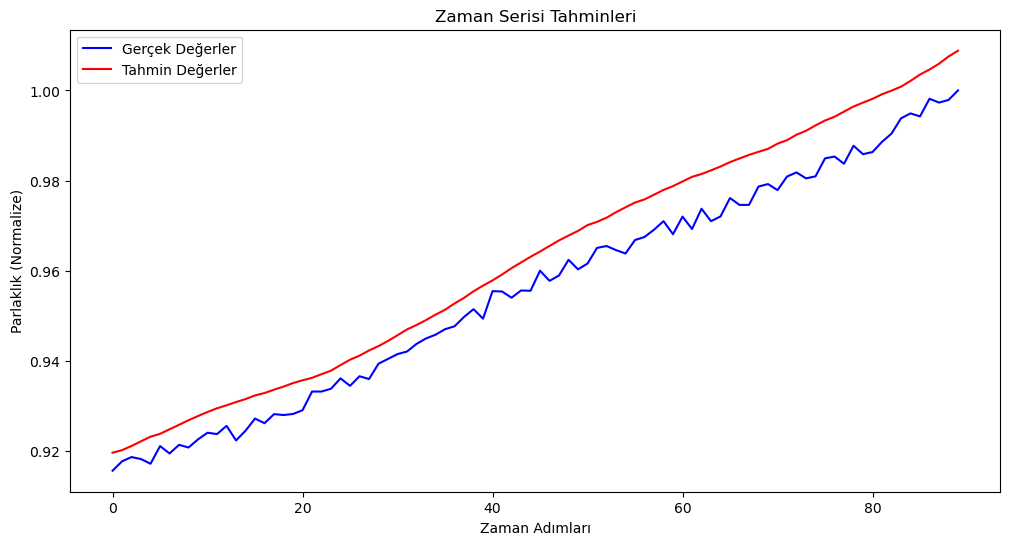

In [229]:
from sklearn.metrics import mean_squared_error

# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)

# Performans değerlendirme
mse_simple_lstm = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_simple_lstm}")

# Tahminleri görselleştir
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Gerçek Değerler', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Tahmin Değerler', color='red')
plt.title("Zaman Serisi Tahminleri")
plt.xlabel("Zaman Adımları")
plt.ylabel("Parlaklık (Normalize)")
plt.legend()
plt.show()

### Earlystopping ekleyelim

In [232]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Test (validation) loss'u izle
    patience=4,          # 4 ardışık epoch boyunca iyileşme olmazsa durdur
    restore_best_weights=True  # En iyi ağırlıkları geri yükle
)


In [234]:
# Modeli oluştur
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Modeli derle
model.compile(optimizer='Adam', loss='mse')


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [236]:
# Modeli eğit
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[loss_callback, early_stopping]  # EarlyStopping'i ekledik
)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2596 - val_loss: 0.0142
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0220 - val_loss: 0.0367
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0114 - val_loss: 0.0017
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 - val_loss: 3.6183e-04
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - val_loss: 2.3399e-05
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - val_loss: 1.6306e-04
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - val_loss: 4.8637e-04
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - val_loss: 0.0011
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - val_loss: 0.0010


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Mean Squared Error (MSE): 2.3398748453473672e-05


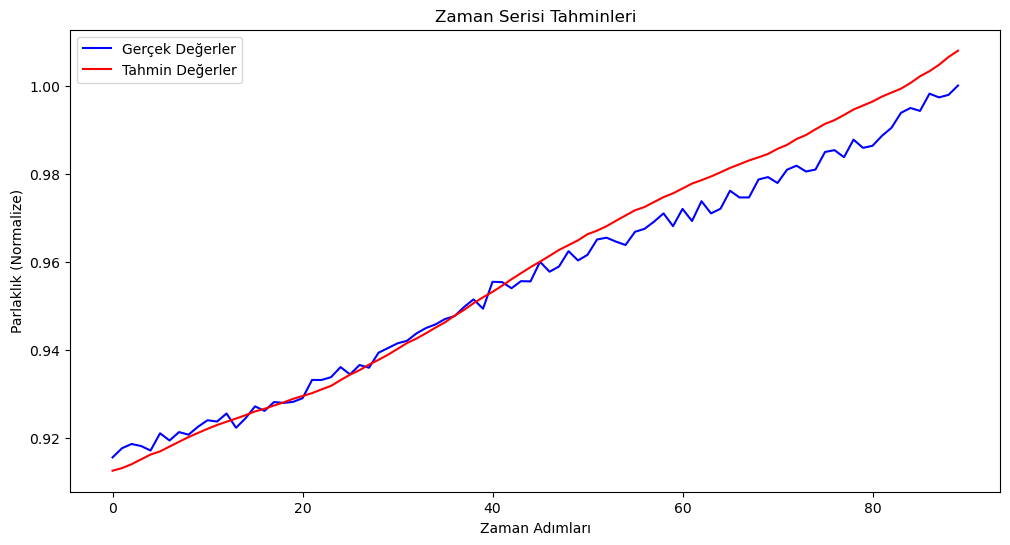

In [238]:
from sklearn.metrics import mean_squared_error

# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)

# Performans değerlendirme
mse_simple_lstm = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_simple_lstm}")

# Tahminleri görselleştir
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Gerçek Değerler', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Tahmin Değerler', color='red')
plt.title("Zaman Serisi Tahminleri")
plt.xlabel("Zaman Adımları")
plt.ylabel("Parlaklık (Normalize)")
plt.legend()
plt.show()

## Daha Karmaşık LSTM Modeli

In [262]:
from tensorflow.keras.layers import Bidirectional
complicated_lstm_model = Sequential([
    Bidirectional(LSTM(128, activation='relu', return_sequences=True, input_shape=(sequence_length, 1))),
    Dropout(0.3),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Tek bir tahmin çıktısı
])

# Modeli derle
complicated_lstm_model.compile(optimizer='Adam', loss='mse')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [264]:
import tensorflow as tf
# Lossları kaydetmek için callback
class LossHistory_Complicated_LSTM(tf.keras.callbacks.Callback):
    def __init__(self):
        super(LossHistory_Complicated_LSTM, self).__init__()
        self.train_loss_history = []
        self.test_loss_history = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_loss_history.append(logs['loss'])
        self.test_loss_history.append(logs['val_loss'])

In [266]:
# Loss callback nesnesi
loss_callback = LossHistory_Complicated_LSTM()

# Modeli eğit
history = complicated_lstm_model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[loss_callback]
)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2565 - val_loss: 0.0266
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0241 - val_loss: 9.5548e-04
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0121 - val_loss: 0.0015
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - val_loss: 0.0020
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - val_loss: 0.0053
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0033 - val_loss: 0.0136
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0033 - val_loss: 0.0226
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0029 - val_loss: 0.0132
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0026 - val_loss: 0.0177
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021 - val_loss: 0.0232
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018 - val_loss: 0.0303
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss:

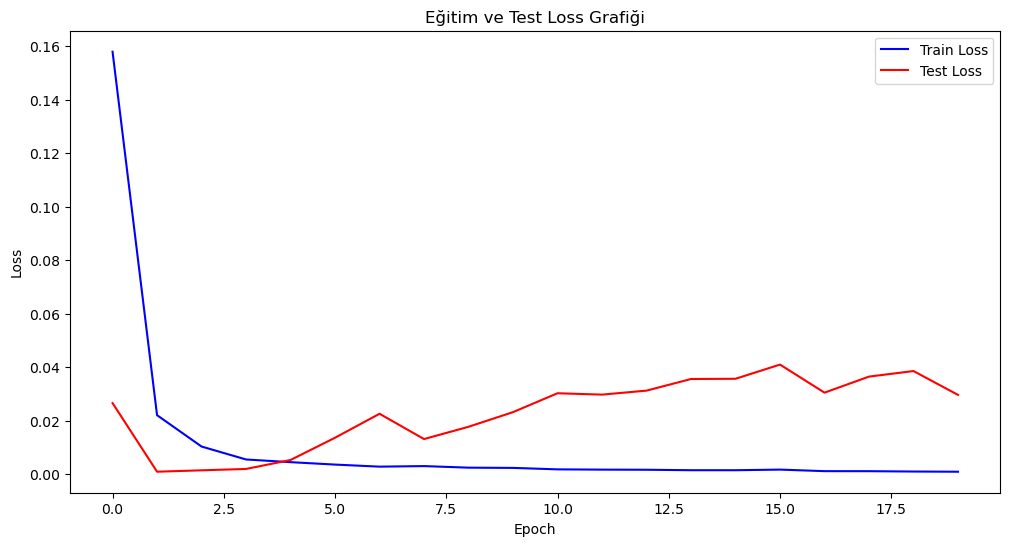

In [270]:
# Train ve Test Loss grafiği
plt.figure(figsize=(12, 6))
plt.plot(loss_callback.train_loss_history, label='Train Loss', color='blue')  # Callback içindeki train loss
plt.plot(loss_callback.test_loss_history, label='Test Loss', color='red')    # Callback içindeki test loss
plt.title("Eğitim ve Test Loss Grafiği")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Overfit oluşmuş gibi görünüyor, büyük ve karmaşık modeller overfite daha yatkın olabilir

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.029652966186404228


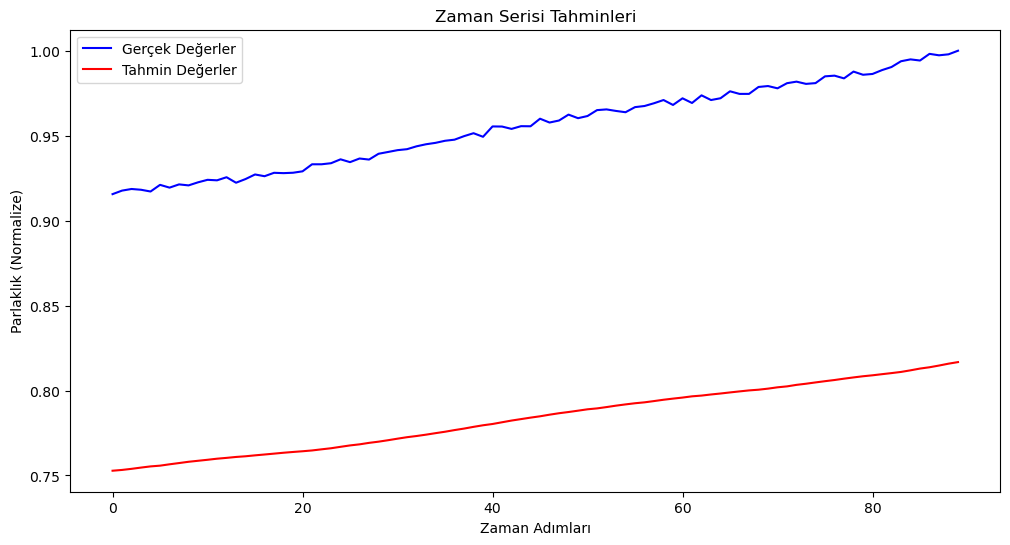

In [273]:

# Test seti üzerinde tahmin yap
y_pred = complicated_lstm_model.predict(X_test)

# Performans değerlendirme
mse_complicated_lstm = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_complicated_lstm}")

# Tahminleri görselleştir
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Gerçek Değerler', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Tahmin Değerler', color='red')
plt.title("Zaman Serisi Tahminleri")
plt.xlabel("Zaman Adımları")
plt.ylabel("Parlaklık (Normalize)")
plt.legend()
plt.show()

### Earlystopping ile tekrar karmaşık lstm modelini eğitelim

In [287]:
complicated_lstm_model = Sequential([
    Bidirectional(LSTM(128, activation='relu', return_sequences=True, input_shape=(sequence_length, 1))),
    Dropout(0.3),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Tek bir tahmin çıktısı
])

# Modeli derle
complicated_lstm_model.compile(optimizer='Adam', loss='mse')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [289]:
import tensorflow as tf
# Lossları kaydetmek için callback
class LossHistory_Complicated_LSTM(tf.keras.callbacks.Callback):
    def __init__(self):
        super(LossHistory_Complicated_LSTM, self).__init__()
        self.train_loss_history = []
        self.test_loss_history = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_loss_history.append(logs['loss'])
        self.test_loss_history.append(logs['val_loss'])

In [291]:
# Loss callback nesnesi
loss_callback = LossHistory_Complicated_LSTM()

# Modeli eğit
history = complicated_lstm_model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[loss_callback,early_stopping]
)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2805 - val_loss: 1.8776e-05
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0185 - val_loss: 0.0070
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0114 - val_loss: 0.0038
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0054 - val_loss: 1.5508e-04
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0057 - val_loss: 0.0086


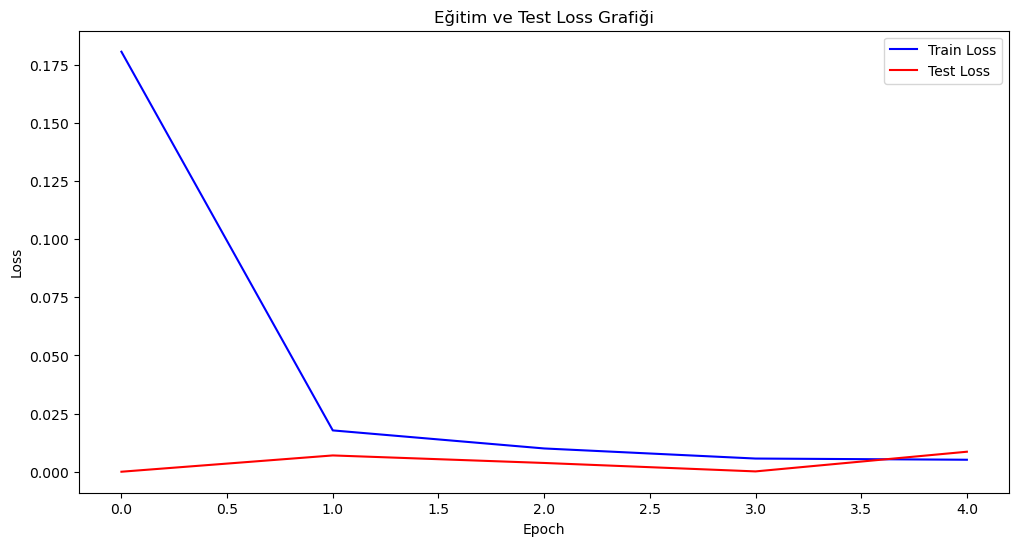

In [292]:
# Train ve Test Loss grafiği
plt.figure(figsize=(12, 6))
plt.plot(loss_callback.train_loss_history, label='Train Loss', color='blue')  # Callback içindeki train loss
plt.plot(loss_callback.test_loss_history, label='Test Loss', color='red')    # Callback içindeki test loss
plt.title("Eğitim ve Test Loss Grafiği")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Mean Squared Error (MSE): 1.8776159777189605e-05


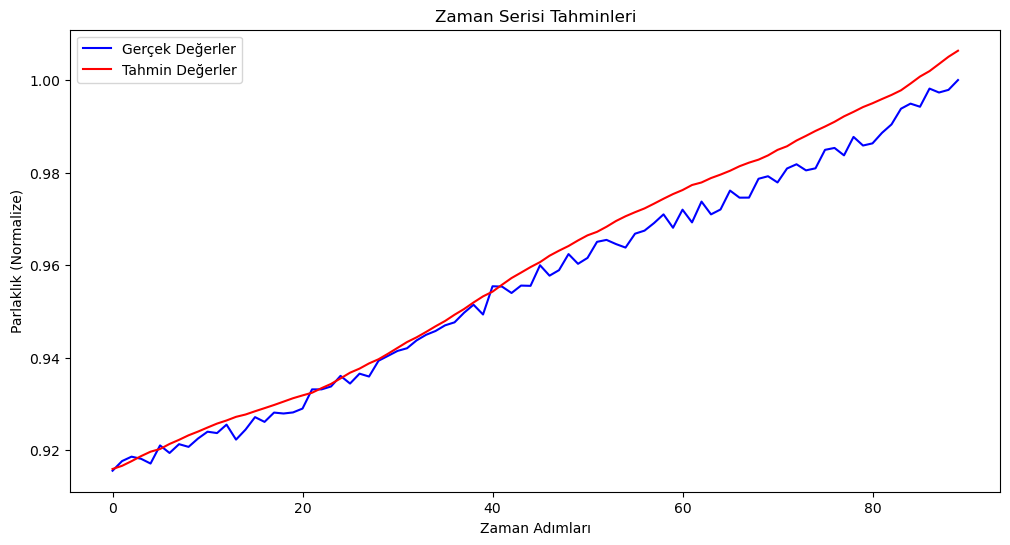

In [293]:

# Test seti üzerinde tahmin yap
y_pred = complicated_lstm_model.predict(X_test)

# Performans değerlendirme
mse_complicated_lstm = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_complicated_lstm}")

# Tahminleri görselleştir
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Gerçek Değerler', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Tahmin Değerler', color='red')
plt.title("Zaman Serisi Tahminleri")
plt.xlabel("Zaman Adımları")
plt.ylabel("Parlaklık (Normalize)")
plt.legend()
plt.show()